In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from scipy.optimize import curve_fit

In [183]:
data = pd.read_csv('house_features.csv')

data = data[data.apply(lambda row: len(row) == 8, axis=1)]

data = data[data['Address'].notnull()]

data['Area'] = pd.to_numeric(data['Area'], errors='coerce')

data = data[data['Area'] < 1000]

data.to_csv('cleaned_dataset.csv', index=False)

cleaned_data_set = pd.read_csv('cleaned_dataset.csv')
cleaned_data_set.describe()

,Area,Room,Price,Price(USD)
count,3450.000000,3450.000000,3.450000e+03,3.450000e+03
mean,106.917391,2.081159,5.375563e+09,1.791854e+05
std,69.550976,0.760216,8.125918e+09,2.708639e+05
min,30.000000,0.000000,3.600000e+06,1.200000e+02
25%,69.000000,2.000000,1.419250e+09,4.730833e+04
50%,90.000000,2.000000,2.900000e+09,9.666667e+04
75%,120.000000,2.000000,6.000000e+09,2.000000e+05
max,929.000000,5.000000,9.240000e+10,3.080000e+06


In [184]:
df = pd.read_csv('cleaned_dataset.csv')
df.describe

<bound method NDFrame.describe of        Area  Room  Parking  Warehouse  Elevator             Address   
0      63.0     1     True       True      True             Shahran  \
1      60.0     1     True       True      True             Shahran   
2      79.0     2     True       True      True              Pardis   
3      95.0     2     True       True      True       Shahrake Qods   
4     123.0     2     True       True      True      Shahrake Gharb   
...     ...   ...      ...        ...       ...                 ...   
3445   86.0     2     True       True      True  Southern Janatabad   
3446   83.0     2     True       True      True            Niavaran   
3447   75.0     2    False      False     False              Parand   
3448  105.0     2     True       True      True              Dorous   
3449   82.0     2    False       True      True              Parand   

             Price  Price(USD)  
0     1.850000e+09    61666.67  
1     1.850000e+09    61666.67  
2     5.500000

In [185]:
enc = OrdinalEncoder()
numeric_address = enc.fit_transform(df[['Address']])
df['numeric_address'] = numeric_address
df.to_csv('cleaned_dataset_2.csv', index=False)

In [186]:
msk = np.random.rand(len(df))  < 0.8
train = df[msk]
test = df[~msk]

In [187]:

train_x = np.asanyarray(train[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'numeric_address']])
train_y = np.asanyarray(train[['Price(USD)']])

test_x = np.asanyarray(test[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'numeric_address']])
test_y = np.asanyarray(test[['Price(USD)']])

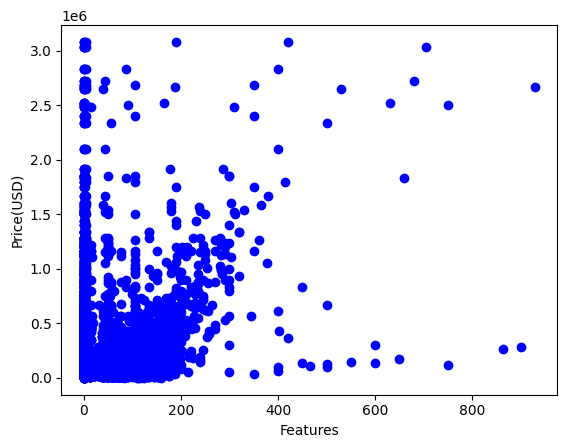

In [188]:

# x_data = df[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'numeric_address']]
# y_data = df[['Price(USD)']]
plt.plot(train_x, train_y, 'bo')
plt.xlabel('Features')
plt.ylabel('Price(USD)')
plt.show()
df.to_csv('cleaned_dataset_2.csv', index=False)

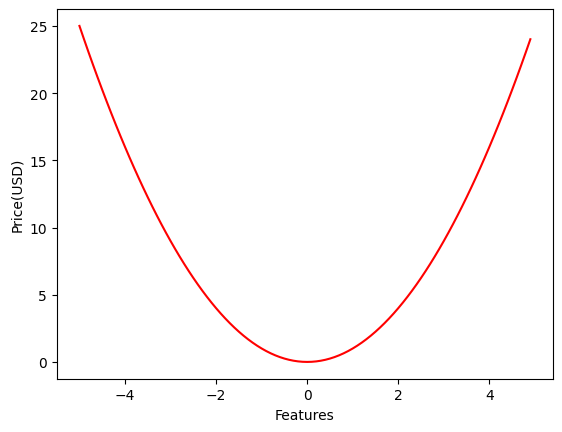

In [189]:

x = np.arange(-5, 5, 0.1)
y = np.power(x, 2)
plt.plot(x, y,  'r')
plt.xlabel('Features')
plt.ylabel('Price(USD)')
plt.show()

In [190]:
def price(entery, a, b):
    y = a * np.power(entery, 50) + b
    return y

[<matplotlib.lines.Line2D object at 0x00000252CB137790>, <matplotlib.lines.Line2D object at 0x00000252CACDD510>, <matplotlib.lines.Line2D object at 0x00000252CB1EA650>, <matplotlib.lines.Line2D object at 0x00000252CB1186D0>, <matplotlib.lines.Line2D object at 0x00000252CB119590>, <matplotlib.lines.Line2D object at 0x00000252CADF2550>]


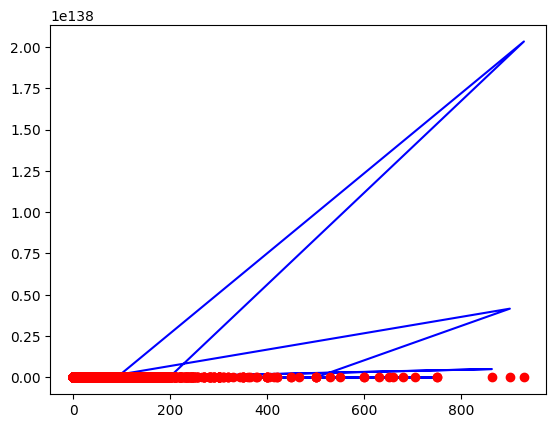

In [191]:
A = 8.07668550e-11
B = 9.84002505e+01
Price = price(train_x, A, B)
plt.plot(train_x, Price, 'b')
print(plt.plot(train_x, train_y, 'ro'))

In [192]:
optimization = curve_fit(price, df['Price(USD)'], df['Area'])
print(optimization[0])
print(optimization[1])

[1. 1.]
[[inf inf]
 [inf inf]]


c:\Users\98935\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_minpack_py.py:966: RuntimeWarning: overflow encountered in square
  cost = np.sum(infodict['fvec'] ** 2)
c:\Users\98935\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
